<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepVision-EVA4.0/blob/master/Utils/Colab_25GBRAM_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Memory Information

In [0]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 25.51GB
Available: 24.54GB
Used: 634.74MB
Percentage: 3.8%


# GPU Information

In [16]:
! nvidia-smi

Fri May 29 08:41:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [9]:
!ls drive/My\ Drive/ML-work/NLP/Advanced\ text\ classification\ with\ spacy/

explacy.py    __pycache__			  Reviews.csv	     score.png
explacy.py.1  reddit-vectors-for-sense2vec-spacy  score_boolean.png


In [10]:
%cd drive/My\ Drive/ML-work/NLP/Advanced\ text\ classification\ with\ spacy/

/content/drive/My Drive/ML-work/NLP/Advanced text classification with spacy


In [2]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-331-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-cg-toolkit' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common-390' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common-410' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common-415' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common-418' for glob 'nvidia*'
Note, selecting 'nvidi

In [3]:
#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
#install CUDA kit dpkg
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0

File ‘cuda-repo-ubuntu1804_10.0.130-1_amd64.deb’ already there; not retrieving.

Selecting previously unselected package cuda-repo-ubuntu1804.
(Reading database ... 120504 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1804_10.0.130-1_amd64.deb ...
Unpacking cuda-repo-ubuntu1804 (10.0.130-1) ...
Setting up cuda-repo-ubuntu1804 (10.0.130-1) ...
Executing: /tmp/apt-key-gpghome.gQ1osKfEcy/gpg.1.sh --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
gpg: requesting key from 'https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub'
gpg: key F60F4B3D7FA2AF80: "cudatools <cudatools@nvidia.com>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://developer.download.nvidia.com/compute/cuda/repo

In [4]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [5]:
!pip install -U spacy

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [0]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
gpu = spacy.prefer_gpu()
print('GPU:', gpu)

GPU: True


In [13]:
food_reviews_df=pd.read_csv('Reviews.csv')
food_reviews_df.shape

(568454, 10)

In [14]:
food_reviews_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
ProductId,B001E4KFG0,B00813GRG4,B000LQOCH0,B000UA0QIQ,B006K2ZZ7K
UserId,A3SGXH7AUHU8GW,A1D87F6ZCVE5NK,ABXLMWJIXXAIN,A395BORC6FGVXV,A1UQRSCLF8GW1T
ProfileName,delmartian,dll pa,"Natalia Corres ""Natalia Corres""",Karl,"Michael D. Bigham ""M. Wassir"""
HelpfulnessNumerator,1,0,1,3,0
HelpfulnessDenominator,1,0,1,3,0
Score,5,1,4,2,5
Time,1303862400,1346976000,1219017600,1307923200,1350777600
Summary,Good Quality Dog Food,Not as Advertised,"""Delight"" says it all",Cough Medicine,Great taffy
Text,I have bought several of the Vitality canned d...,Product arrived labeled as Jumbo Salted Peanut...,This is a confection that has been around a fe...,If you are looking for the secret ingredient i...,Great taffy at a great price. There was a wid...


In [0]:
food_reviews_df = food_reviews_df[['Text','Score']].dropna()

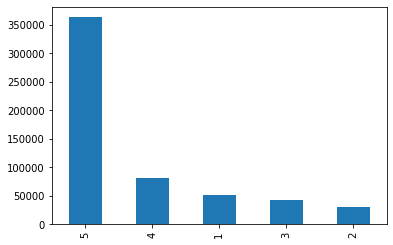

In [16]:
ax=food_reviews_df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score.png");

In [17]:
food_reviews_df.Score[food_reviews_df.Score<=3]=0
food_reviews_df.Score[food_reviews_df.Score>=4]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


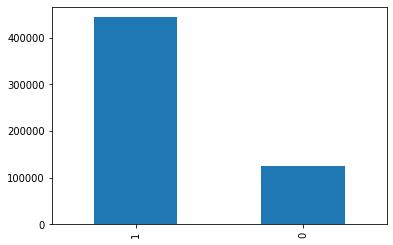

In [18]:
ax=food_reviews_df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score_boolean.png");

In [19]:
food_reviews_df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [0]:
train_pos_df=food_reviews_df[food_reviews_df.Score==1][:50000]
train_neg_df=food_reviews_df[food_reviews_df.Score==0][:50000]

In [21]:
train_df=train_pos_df.append(train_neg_df)
train_df.shape

(100000, 2)

In [22]:
spacy_tok = spacy.load('en_core_web_sm')
sample_review=food_reviews_df.Text[54]
sample_review

"I roast at home with a stove-top popcorn popper (but I do it outside, of course). These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method. The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time. The aroma is strong and persistent. The taste is smooth, velvety, yet lively."

In [23]:
parsed_review = spacy_tok(sample_review)
parsed_review

I roast at home with a stove-top popcorn popper (but I do it outside, of course). These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method. The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time. The aroma is strong and persistent. The taste is smooth, velvety, yet lively.

In [24]:
!wget https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py

--2020-05-29 21:44:31--  https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6863 (6.7K) [text/plain]
Saving to: ‘explacy.py.2’

explacy.py.2        100%[===================>]   6.70K  --.-KB/s    in 0.001s  

2020-05-29 21:44:31 (4.58 MB/s) - ‘explacy.py.2’ saved [6863/6863]



In [25]:
import explacy
explacy.print_parse_info(spacy_tok, 'The salad was surprisingly tasty.')

Dep tree Token        Dep type Lemma        Part of Sp
──────── ──────────── ──────── ──────────── ──────────
    ┌─►  The          det      the          DET       
 ┌─►└──  salad        nsubj    salad        NOUN      
┌┼─────  was          ROOT     be           AUX       
││  ┌─►  surprisingly advmod   surprisingly ADV       
│└─►└──  tasty        acomp    tasty        ADJ       
└─────►  .            punct    .            PUNCT     


In [26]:
explacy.print_parse_info(spacy_tok,food_reviews_df.Text[0])

Dep tree              Token       Dep type Lemma      Part of Sp
───────────────────── ─────────── ──────── ────────── ──────────
                 ┌──► I           nsubj    -PRON-     PRON      
                 │┌─► have        aux      have       AUX       
┌┬┬┬─────────────┴┴── bought      ROOT     buy        VERB      
│││└─►┌────────────── several     dobj     several    ADJ       
│││   └─►┌─────────── of          prep     of         ADP       
│││      │  ┌───────► the         det      the        DET       
│││      │  │┌──────► Vitality    nmod     Vitality   PROPN     
│││      │  ││┌─────► canned      amod     can        VERB      
│││      │  │││   ┌─► dog         compound dog        NOUN      
│││      │  │││┌─►└── food        compound food       NOUN      
│││      └─►└┴┴┴───── products    pobj     product    NOUN      
││└─────────────────► and         cc       and        CCONJ     
││                ┌─► have        aux      have       AUX       
│└──────►┌────────┴── fou

In [27]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(parsed_review):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'shape'] = token.shape_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,I,-PRON-,PRON,PRP,nsubj,X,True,True,False
1,roast,"(roast,)",VERB,VBP,ROOT,xxxx,True,False,False
2,at,"(at,)",ADP,IN,prep,xx,True,True,False
3,home,"(home,)",NOUN,NN,pobj,xxxx,True,False,False
4,with,"(with,)",ADP,IN,prep,xxxx,True,True,False
5,a,"(a,)",DET,DT,det,x,True,True,False
6,stove,"(stove,)",ADJ,JJ,npadvmod,xxxx,True,False,False
7,-,"(-,)",PUNCT,HYPH,punct,-,False,False,True
8,top,"(top,)",NOUN,NN,amod,xxx,True,True,False
9,popcorn,"(popcorn,)",NOUN,NN,compound,xxxx,True,False,False


In [28]:
spacy.displacy.render(parsed_review, style='ent', jupyter=True)

In [29]:
spacy.explain('GPE') # to explain POS tag

'Countries, cities, states'

In [30]:
sentence_spans = list(parsed_review.sents)
sentence_spans

[I roast at home with a stove-top popcorn popper (but I do it outside, of course).,
 These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method.,
 The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time.,
 The aroma is strong and persistent.,
 The taste is smooth, velvety, yet lively.]

In [31]:
displacy.render(parsed_review, style='dep', jupyter=True,options={'distance': 140})

In [32]:
options = {'compact': True, 'bg': 'blue','distance': 140,
           'color': 'white', 'font': 'Trebuchet MS'}
displacy.render(parsed_review, jupyter=True, style='dep', options=options)

In [33]:
spacy.explain("ADJ") ,spacy.explain("det") ,spacy.explain("ADP") ,spacy.explain("prep")  # to understand tags

('adjective', 'determiner', 'adposition', 'prepositional modifier')

In [34]:
noun_chunks_df = pd.DataFrame()

for i, chunk in enumerate(parsed_review.noun_chunks):
    noun_chunks_df.loc[i, 'text'] = chunk.text
    noun_chunks_df.loc[i, 'root'] = chunk.root,
    noun_chunks_df.loc[i, 'root.text'] = chunk.root.text,
    noun_chunks_df.loc[i, 'root.dep_'] = chunk.root.dep_
    noun_chunks_df.loc[i, 'root.head.text'] = chunk.root.head.text

noun_chunks_df[:20]

,text,root,root.text,root.dep_,root.head.text
0,I,I,I,nsubj,roast
1,home,"(home,)","(home,)",pobj,at
2,a stove-top popcorn popper,"(popper,)","(popper,)",pobj,with
3,I,"(I,)","(I,)",nsubj,do
4,it,"(it,)","(it,)",dobj,do
5,course,"(course,)","(course,)",pobj,of
6,These beans,"(beans,)","(beans,)",nsubj,seem
7,Coffee Bean Direct Green Mexican Altura,"(Altura,)","(Altura,)",appos,beans
8,this method,"(method,)","(method,)",pobj,for
9,The first and second cracks,"(cracks,)","(cracks,)",nsubj,are


In [35]:
pip install scattertext

In [0]:
import scattertext as st
nlp = spacy.load('en',disable_pipes=["tagger","ner"])
train_df['parsed'] = train_df.Text[49500:50500].apply(nlp)
corpus = st.CorpusFromParsedDocuments(train_df[49500:50500],
                             category_col='Score',
                             parsed_col='parsed').build()

In [0]:
html = st.produce_scattertext_explorer(corpus,
          category=1,
          category_name='Positive',
          not_category_name='Negative',
          width_in_pixels=700,
          minimum_term_frequency=15,
          term_significance = st.LogOddsRatioUninformativeDirichletPrior(),
          )

In [37]:
pip install sense2vec

In [0]:
import sense2vec
from sense2vec import Sense2VecComponent

s2v = Sense2VecComponent('/reddit-vectors-for-sense2vec-spacy/reddit_vectors-1.1.0/reddit_vectors-1.1.0/')
spacy_tok.add_pipe(s2v)
doc = spacy_tok(u"dessert")
freq = doc[0]._.s2v_freq
vector = doc[0]._.s2v_vec
most_similar = doc[0]._.s2v_most_similar(5)
most_similar,freq


In [0]:
doc = spacy_tok(u"burger")
most_similar = doc[0]._.s2v_most_similar(4)
most_similar

In [36]:
doc = spacy_tok(u"peanut butter")
most_similar = doc[0]._.s2v_most_similar(4)
most_similar


[]

In [38]:
train_df['tuples'] = train_df.apply(
    lambda row: (row['Text'],row['Score']), axis=1)
train = train_df['tuples'].tolist()
train[:1]

[('I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
  1)]

In [39]:
train[-2:]

[("I ordered this product specifically to try out the three different types of products. However, when I received the product, I opened it up only to find three of the Barn Burner salsas - obviously not what I had ordered.<br /><br />Buy at your own risk - who knows what you'll end up getting.",
  0),
 ('Terrific - easy to use and great taste.  Only complaint is that the price is MUCH too high.',
  0)]

In [0]:
#functions from spacy documentation
def load_data(limit=0, split=0.8):
    train_data = train
    np.random.shuffle(train_data)
    train_data = train_data[-limit:]
    texts, labels = zip(*train_data)
    cats = [{'POSITIVE': bool(y)} for y in labels]
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])

def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 1e-8  # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 1e-8  # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2 * (precision * recall) / (precision + recall)
    return {'textcat_p': precision, 'textcat_r': recall, 'textcat_f': f_score}

#("Number of texts to train from","t" , int)
n_texts=35000
#You can increase texts count if you have more computational power.

#("Number of training iterations", "n", int))
n_iter=30

In [0]:
nlp = spacy.load('en_core_web_sm')  # create english Language class

In [47]:
!pip install -U 'cupy-cuda100==7.3.0'

     |████████████████████████████████| 335.2MB 47kB/s 
  Found existing installation: cupy-cuda100 8.0.0b3
    Uninstalling cupy-cuda100-8.0.0b3:
      Successfully uninstalled cupy-cuda100-8.0.0b3


In [42]:
# add the text classifier to the pipeline if it doesn't exist
# nlp.create_pipe works for built-ins that are registered with spaCy
if 'textcat' not in nlp.pipe_names:
    textcat = nlp.create_pipe('textcat')
    nlp.add_pipe(textcat, last=True)
# otherwise, get it, so we can add labels to it
else:
    textcat = nlp.get_pipe('textcat')

# add label to text classifier
textcat.add_label('POSITIVE')

# load the dataset
print("Loading food reviews data...")
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_texts)
print("Using {} examples ({} training, {} evaluation)"
      .format(n_texts, len(train_texts), len(dev_texts)))
train_data = list(zip(train_texts,
                      [{'cats': cats} for cats in train_cats]))

Loading food reviews data...
Using 35000 examples (28000 training, 7000 evaluation)


In [43]:
# get names of other pipes to disable them during training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat']
with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()
    print("Training the model...")
    print('{:^5}\t{:^5}\t{:^5}\t{:^5}'.format('LOSS', 'P', 'R', 'F'))
    for i in range(n_iter):
        losses = {}
        # batch up the examples using spaCy's minibatch
        batches = minibatch(train_data, size=compounding(4., 32., 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2,
                       losses=losses)
        with textcat.model.use_params(optimizer.averages):
            # evaluate on the dev data split off in load_data()
            scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
        print('{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}'  # print a simple table
              .format(losses['textcat'], scores['textcat_p'],
                      scores['textcat_r'], scores['textcat_f']))

Training the model...
LOSS 	  P  	  R  	  F  
7.824	0.861	0.829	0.845
4.342	0.872	0.862	0.867
3.021	0.870	0.868	0.869
2.291	0.875	0.860	0.867
1.951	0.872	0.867	0.869
1.596	0.870	0.864	0.867
1.830	0.867	0.860	0.863
1.848	0.867	0.844	0.855
2.139	0.860	0.852	0.856
2.218	0.859	0.842	0.851
2.102	0.859	0.830	0.844
2.059	0.867	0.821	0.843
2.521	0.831	0.857	0.844
3.030	0.832	0.848	0.840
2.587	0.842	0.846	0.844
2.198	0.853	0.844	0.849
2.235	0.856	0.846	0.851
2.205	0.859	0.847	0.853
2.245	0.858	0.846	0.852
2.538	0.853	0.848	0.851
2.347	0.845	0.843	0.844
2.072	0.853	0.849	0.851
2.121	0.855	0.849	0.852
2.060	0.856	0.848	0.852
2.046	0.856	0.848	0.852
1.934	0.856	0.848	0.852
2.011	0.856	0.850	0.853
1.974	0.857	0.850	0.854
2.038	0.861	0.850	0.856
2.132	0.861	0.850	0.855


In [44]:
# test the trained model
test_text1 = 'This tea is fun to watch as the flower expands in the water. Very smooth taste and can be used again and again in the same day. If you love tea, you gotta try these "flowering teas"'
test_text2="I bought this product at a local store, not from this seller.  I usually use Wellness canned food, but thought my cat was bored and wanted something new.  So I picked this up, knowing that Evo is a really good brand (like Wellness).<br /><br />It is one of the most disgusting smelling cat foods I've ever had the displeasure of using.  I was gagging while trying to put it into the bowl.  My cat took one taste and walked away, and chose to eat nothing until I replaced it 12 hours later with some dry food.  I would try another flavor of their food - since I know it's high quality - but I wouldn't buy the duck flavor again."
doc = nlp(test_text1)
test_text1, doc.cats

('This tea is fun to watch as the flower expands in the water. Very smooth taste and can be used again and again in the same day. If you love tea, you gotta try these "flowering teas"',
 {'POSITIVE': 0.9355192184448242})

In [45]:
doc2 = nlp(test_text2)
test_text2, doc2.cats

("I bought this product at a local store, not from this seller.  I usually use Wellness canned food, but thought my cat was bored and wanted something new.  So I picked this up, knowing that Evo is a really good brand (like Wellness).<br /><br />It is one of the most disgusting smelling cat foods I've ever had the displeasure of using.  I was gagging while trying to put it into the bowl.  My cat took one taste and walked away, and chose to eat nothing until I replaced it 12 hours later with some dry food.  I would try another flavor of their food - since I know it's high quality - but I wouldn't buy the duck flavor again.",
 {'POSITIVE': 0.02191326394677162})

In [46]:
output_dir=%pwd
nlp.to_disk(output_dir)
print("Saved model to", output_dir)

Saved model to /content/drive/My Drive/ML-work/NLP/Advanced text classification with spacy


In [47]:
# test the saved model
print("Loading from", output_dir)
nlp2 = spacy.load(output_dir)
doc2 = nlp2(test_text2)
print(test_text2, doc2.cats)

Loading from /content/drive/My Drive/ML-work/NLP/Advanced text classification with spacy
I bought this product at a local store, not from this seller.  I usually use Wellness canned food, but thought my cat was bored and wanted something new.  So I picked this up, knowing that Evo is a really good brand (like Wellness).<br /><br />It is one of the most disgusting smelling cat foods I've ever had the displeasure of using.  I was gagging while trying to put it into the bowl.  My cat took one taste and walked away, and chose to eat nothing until I replaced it 12 hours later with some dry food.  I would try another flavor of their food - since I know it's high quality - but I wouldn't buy the duck flavor again. {'POSITIVE': 0.02191326394677162}
